### Modeling

#### Preparing data for baseline model
##### Import and prepare data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed data
df = pd.read_csv("~/Desktop/whale-hotspots/data_synthetic_realistic.csv")

# Fill any missing values (if any remain)
df["chlorophyll"].fillna(df["chlorophyll"].median(), inplace=True)

# Define features (predictors) and target
X = df[["sst", "chlorophyll", "u", "v"]]
y = df["presence"]

# Train-test split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("✅ Data split done")
print("Train size:", X_train.shape, "Test size:", X_test.shape)

✅ Data split done
Train size: (614, 4) Test size: (205, 4)


/var/folders/l2/p3fp1v2n08d1ygy1cmby6ycm0000gn/T/ipykernel_20182/1365132580.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["chlorophyll"].fillna(df["chlorophyll"].median(), inplace=True)


##### Scale features

In [2]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Train the Logistic Regression model
We’ll use class_weight='balanced' to fix the whale presence imbalance (only ~5% are 1’s).

In [3]:
model_lr = LogisticRegression(class_weight='balanced', random_state=42)
model_lr.fit(X_train_scaled, y_train)

y_pred = model_lr.predict(X_test_scaled)
y_prob = model_lr.predict_proba(X_test_scaled)[:,1]

##### Evaluate performance

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       148
           1       0.44      0.68      0.54        57

    accuracy                           0.67       205
   macro avg       0.64      0.68      0.64       205
weighted avg       0.73      0.67      0.69       205

ROC-AUC Score: 0.752


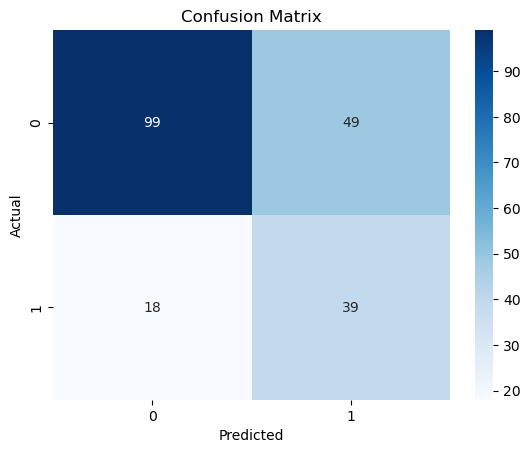

In [4]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", round(roc_auc_score(y_test, y_prob), 3))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Plot ROC curve

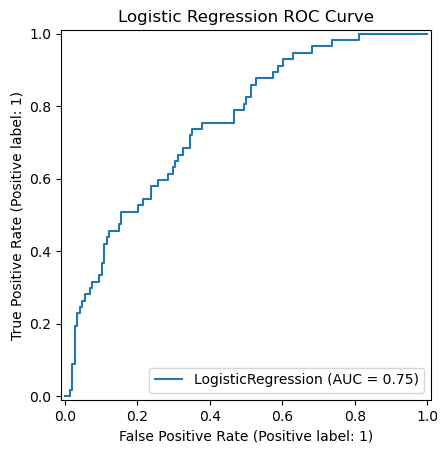

In [5]:
RocCurveDisplay.from_estimator(model_lr, X_test_scaled, y_test)
plt.title("Logistic Regression ROC Curve")
plt.show()

##### Check feature influence (coefficients)

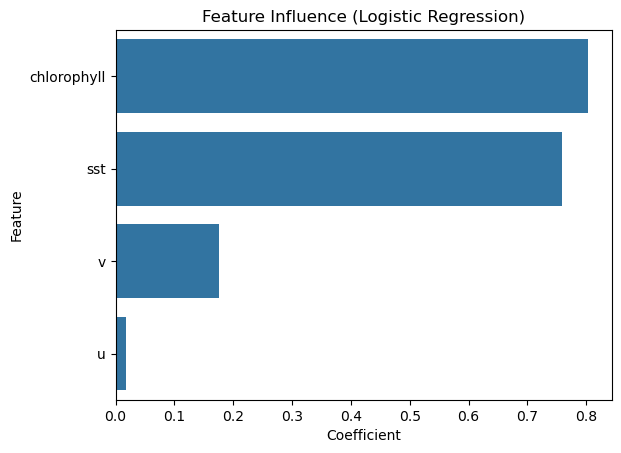

,Feature,Coefficient
1,chlorophyll,0.803048
0,sst,0.758912
3,v,0.175961
2,u,0.017314


In [6]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model_lr.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

sns.barplot(x="Coefficient", y="Feature", data=coef_df)
plt.title("Feature Influence (Logistic Regression)")
plt.show()

coef_df